# 1. Imports 

In [1]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/1a/32/1c2556b5c28f75778c3c3eade1a30f8a20693ac244b9c22c4e7000cd9617/ultralytics-8.3.245-py3-none-any.whl.metadata
  Obtaining dependency information for polars>=0.20.0 from https://files.pythonhosted.org/packages/f6/c6/36a1b874036b49893ecae0ac44a2f63d1a76e6212631a5b2f50a86e0e8af/polars-1.36.1-py3-none-any.whl.metadata
  Obtaining dependency information for ultralytics-thop>=2.0.18 from https://files.pythonhosted.org/packages/7f/c7/fb42228bb05473d248c110218ffb8b1ad2f76728ed8699856e5af21112ad/ultralytics_thop-2.0.18-py3-none-any.whl.metadata
  Obtaining dependency information for polars-runtime-32==1.36.1 from https://files.pythonhosted.org/packages/54/1e/2707bee75a780a953a77a2c59829ee90ef55708f02fc4add761c579bf76e/polars_runtime_32-1.36.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.0 MB/s eta 0:00:00a 0:00:01
   ━━

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import yaml
import math
import wandb
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 2. Visualize some samples

In [3]:
# Define the paths to your train and val directories
train_dir = '/kaggle/input/face-detection-dataset/images/train'
val_dir = '/kaggle/input/face-detection-dataset/images/val'

# Function to count images in a directory
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file is an image file (adjust extensions as needed)
            if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
                count += 1
    return count

# Count images in the train and val directories
train_images_count = count_images(train_dir)
val_images_count = count_images(val_dir)

# Print the counts
print(f"Number of images in train directory: {train_images_count}")
print(f"Number of images in val directory: {val_images_count}")

Number of images in train directory: 13386
Number of images in val directory: 3347


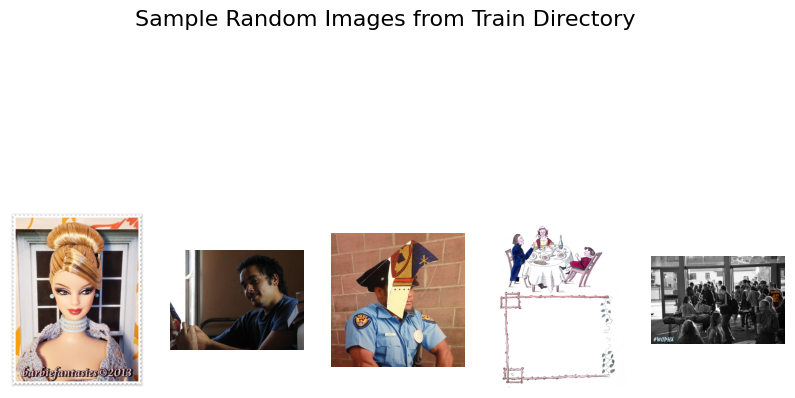

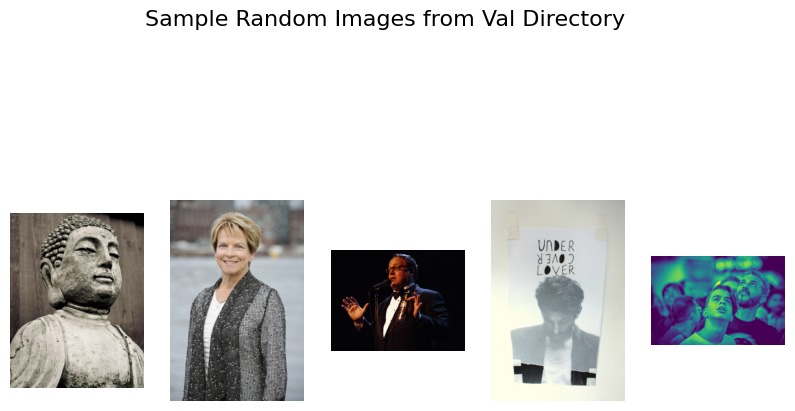

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to your train and val directories
train_dir = '/kaggle/input/face-detection-dataset/images/train'
val_dir = '/kaggle/input/face-detection-dataset/images/val'

# Function to visualize random images from a directory
def visualize_random_images(directory, num_images=5):
    images_to_show = num_images
    fig = plt.figure(figsize=(10, 6))

    # List all image files in the directory
    all_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
                img_path = os.path.join(root, file)
                all_files.append(img_path)

    # Shuffle the list of image paths
    random.shuffle(all_files)
    
    # Display random images
    for i in range(images_to_show):
        img_path = all_files[i]
        img = mpimg.imread(img_path)
        plt.subplot(1, images_to_show, i + 1)
        plt.imshow(img)
        plt.axis('off')

# Visualize random images in the train directory
visualize_random_images(train_dir)
plt.suptitle('Sample Random Images from Train Directory', fontsize=16)
plt.show()

# Visualize random images in the val directory
visualize_random_images(val_dir)
plt.suptitle('Sample Random Images from Val Directory', fontsize=16)
plt.show()

# 3. Set Config file and train model

In [5]:
config_file = {
    'data':'/kaggle/input/face-detection-dataset',
    'train':'/kaggle/input/face-detection-dataset/images/train',
    'train_labels':'/kaggle/input/face-detection-dataset/labels/train',
    'val':'/kaggle/input/face-detection-dataset/images/val',
    'val_labels':'/kaggle/input/face-detection-dataset/labels/val',
    'names':['Human Face']
}

In [6]:
with open('config_file.yaml', 'w') as file:
    yaml.dump(config_file, file, default_flow_style=False)

In [7]:
with open('/kaggle/working/config_file.yaml', 'r') as file:
    loaded_config = yaml.safe_load(file)

In [8]:
# Log in to Weights and Biases with your API key
wandb.login(key='743abff184a2764efeab329bcbae4f6889ec1cd2')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [9]:
model = YOLO('yolov8n.pt')
model.train(data='/kaggle/working/config_file.yaml', epochs=20)

Ultralytics 8.3.245 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/config_file.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

2026-01-01 04:57:10,958	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2026-01-01 04:57:11,798	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'
val: Fast image access ✅ (ping: 0.6±1.3 ms, read: 60.4±39.7 MB/s, size: 355.2 KB)
val: Scanning /kaggle/input/face-detection-dataset/labels/val... 3347 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 3347/3347 320.7it/s 10.4s<0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/face-detection-dataset/labels is not writable, cache not saved.
Plotting labels to /kaggle/working/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cba64fc9750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# 4. Visualize results

In [10]:
directory_path = '/kaggle/working/runs/detect/train'  

# List the contents of the directory
directory_contents = os.listdir(directory_path)

# Display the contents of the directory
print("Contents of the directory:")
for item in directory_contents:
    print(item)

Contents of the directory:
val_batch1_pred.jpg
confusion_matrix_normalized.png
train_batch8371.jpg
train_batch8370.jpg
val_batch0_pred.jpg
val_batch0_labels.jpg
args.yaml
BoxF1_curve.png
BoxP_curve.png
train_batch8372.jpg
confusion_matrix.png
train_batch0.jpg
val_batch1_labels.jpg
BoxPR_curve.png
weights
results.csv
BoxR_curve.png
val_batch2_labels.jpg
val_batch2_pred.jpg
results.png
train_batch2.jpg
train_batch1.jpg
labels.jpg


In [11]:
file_path = '/kaggle/working/runs/detect/train/args.yaml'

with open(file_path, 'r') as file:
    content = yaml.safe_load(file)

print(content)

{'task': 'detect', 'mode': 'train', 'model': 'yolov8n.pt', 'data': '/kaggle/working/config_file.yaml', 'epochs': 20, 'time': None, 'patience': 100, 'batch': 16, 'imgsz': 640, 'save': True, 'save_period': -1, 'cache': False, 'device': None, 'workers': 8, 'project': None, 'name': 'train', 'exist_ok': False, 'pretrained': True, 'optimizer': 'auto', 'verbose': True, 'seed': 0, 'deterministic': True, 'single_cls': False, 'rect': False, 'cos_lr': False, 'close_mosaic': 10, 'resume': False, 'amp': True, 'fraction': 1.0, 'profile': False, 'freeze': None, 'multi_scale': False, 'compile': False, 'overlap_mask': True, 'mask_ratio': 4, 'dropout': 0.0, 'val': True, 'split': 'val', 'save_json': False, 'conf': None, 'iou': 0.7, 'max_det': 300, 'half': False, 'dnn': False, 'plots': True, 'source': None, 'vid_stride': 1, 'stream_buffer': False, 'visualize': False, 'augment': False, 'agnostic_nms': False, 'classes': None, 'retina_masks': False, 'embed': None, 'show': False, 'save_frames': False, 'save_t

In [ ]:
directory_path = '/kaggle/working/runs/detect/train'  

# Get a list of image files in the directory
image_files = [file for file in os.listdir(directory_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Visualize each image file
for img_file in image_files:
    img_path = os.path.join(directory_path, img_file)
    img = mpimg.imread(img_path)
    
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()

In [ ]:
my_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

In [ ]:
def draw_bbox(frame, boxes, colors):
    """
    Draws bounding boxes with labels on the input frame.

    Args:
        frame (numpy.ndarray): The input image frame.
        boxes (List[Object]): List of bounding boxes.
        class_names (List[str]): List of class names.
        colors (List[Tuple[int]]): List of RGB color values.

    Returns:
        None
    """
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Extracting the class label and name
        cls = int(box.cls[0])
        class_name = "Face"

        # Retrieving the color for the class
        color = colors[cls]

        # Drawing the bounding box on the image
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)

        # Formatting the confidence level and label text
        conf = math.ceil((box.conf[0] * 100)) / 100
        label = f'{class_name} ({conf}%)'

        # Calculating the size of the label text
        text_size = cv2.getTextSize(label, 0, fontScale=1, thickness=2)[0]
        # Calculating the coordinates for the background rectangle of the label
        rect_coords = x1 + text_size[0], y1 - text_size[1] - 3

        # Drawing the background rectangle and the label text
        cv2.rectangle(frame, (x1, y1), rect_coords, color, -1, cv2.LINE_AA)
        cv2.putText(frame, label, (x1, y1 - 2), 0, 1, (255, 255, 255), thickness=1, lineType=cv2.LINE_AA)
    return frame

In [ ]:
source = '/kaggle/input/people/Crowd-of-Diverse-People_800x528.jpg'
frame = cv2.imread(source)
result = my_model(frame, conf=0.5)[0]
 
boxes = result.boxes
frame = draw_bbox(frame, boxes,  (0,255,255))
plt.imshow(frame[:,:,::-1])


In [ ]:
from IPython.display import FileLink

FileLink('runs/detect/train/weights/best.pt')

In [ ]:
import shutil
import os


output_folder = '/kaggle/working/runs' 
zip_file_name = 'train_results'

shutil.make_archive(zip_file_name, 'zip', output_folder)

print(f"{zip_file_name}.zip")